In [4]:
#Dataset - https://drive.google.com/drive/u/0/my-drive/allergy.csv

In [5]:
#Importing all the required modules/packages and/or libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
train=pd.read_csv('/content/drive/MyDrive/allergy.csv')

In [49]:
train

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
0,0,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,ALLERGY
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,1,1,1,ALLERGY
2,0,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,ALLERGY
3,0,0,0,1,1,0,0,0,0,0,...,0,1,1,0,0,1,0,1,1,ALLERGY
4,0,0,1,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,1,1,ALLERGY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44448,1,0,0,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,1,0,FLU
44449,1,1,0,1,1,0,1,1,0,1,...,0,1,1,0,0,0,0,1,0,FLU
44450,0,0,1,0,1,0,0,0,1,1,...,1,1,0,0,0,0,0,1,0,FLU
44451,0,0,0,1,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,FLU


In [47]:
cols = ['FEVER', 'NAUSEA', 'VOMITING', 'DIARRHEA',
       'SHORTNESS_OF_BREATH', 'DIFFICULTY_BREATHING']
print(cols)

['FEVER', 'NAUSEA', 'VOMITING', 'DIARRHEA', 'SHORTNESS_OF_BREATH', 'DIFFICULTY_BREATHING']


In [23]:
train.isnull().sum()

COUGH                   0
MUSCLE_ACHES            0
TIREDNESS               0
SORE_THROAT             0
RUNNY_NOSE              0
STUFFY_NOSE             0
FEVER                   0
NAUSEA                  0
VOMITING                0
DIARRHEA                0
SHORTNESS_OF_BREATH     0
DIFFICULTY_BREATHING    0
LOSS_OF_TASTE           0
LOSS_OF_SMELL           0
ITCHY_NOSE              0
ITCHY_EYES              0
ITCHY_MOUTH             0
ITCHY_INNER_EAR         0
SNEEZING                0
PINK_EYE                0
TYPE                    0
dtype: int64

FLU        25000
ALLERGY    16381
COVID       2048
COLD        1024
Name: TYPE, dtype: int64


Text(0.5, 0, 'TYPE')

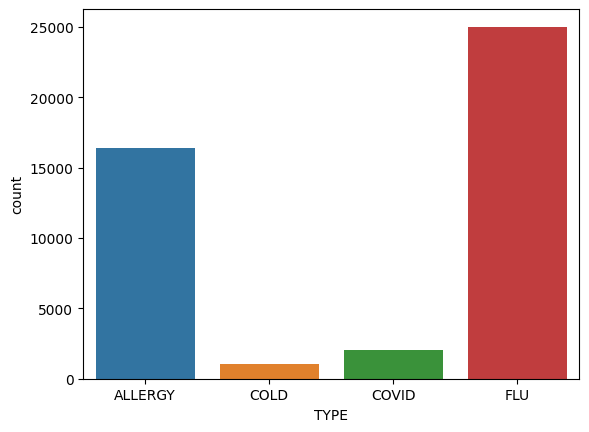

In [40]:
print(train['TYPE'].value_counts())
_ = sns.countplot(x='TYPE', data=train)
plt.xlabel('TYPE')

FLU        25000
ALLERGY    16381
COVID       2048
COLD        1024
Name: TYPE, dtype: int64


Text(0, 0.5, 'FEVER')

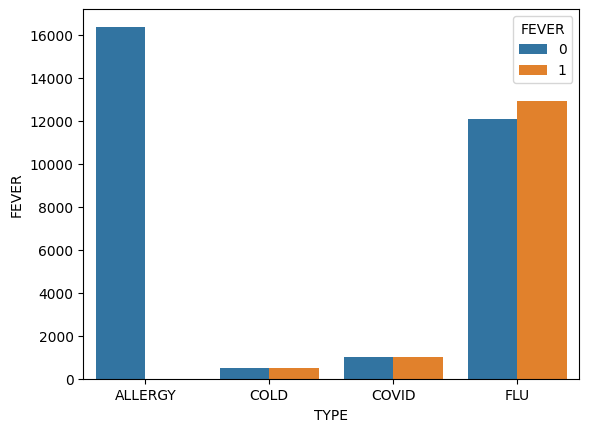

In [42]:
print(train['TYPE'].value_counts())
_ = sns.countplot(x='TYPE', data=train, hue='FEVER')
plt.xlabel('TYPE')
plt.ylabel('FEVER')

FLU        25000
ALLERGY    16381
COVID       2048
COLD        1024
Name: TYPE, dtype: int64


Text(0, 0.5, 'PINK_EYE')

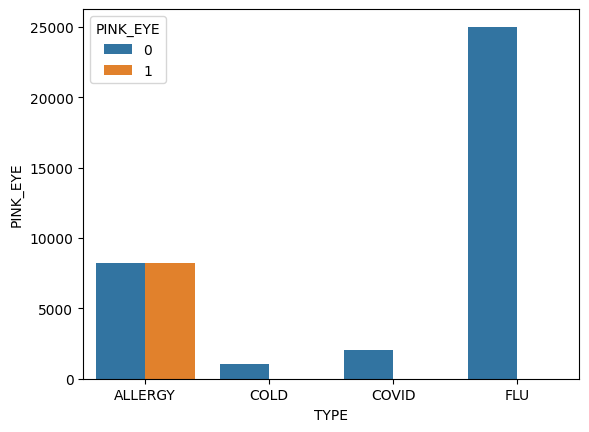

In [44]:
print(train['TYPE'].value_counts())
_ = sns.countplot(x='TYPE', data=train, hue='PINK_EYE')
plt.xlabel('TYPE')
plt.ylabel('PINK_EYE')

FLU        25000
ALLERGY    16381
COVID       2048
COLD        1024
Name: TYPE, dtype: int64


Text(0, 0.5, 'COUGH')

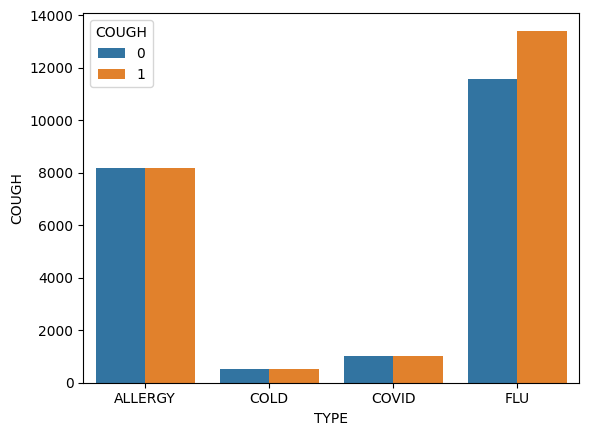

In [45]:
print(train['TYPE'].value_counts())
_ = sns.countplot(x='TYPE', data=train, hue='COUGH')
plt.xlabel('TYPE')
plt.ylabel('COUGH')

<ipython-input-46-ca0f1b5e1cc8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr('pearson'),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)


<Axes: >

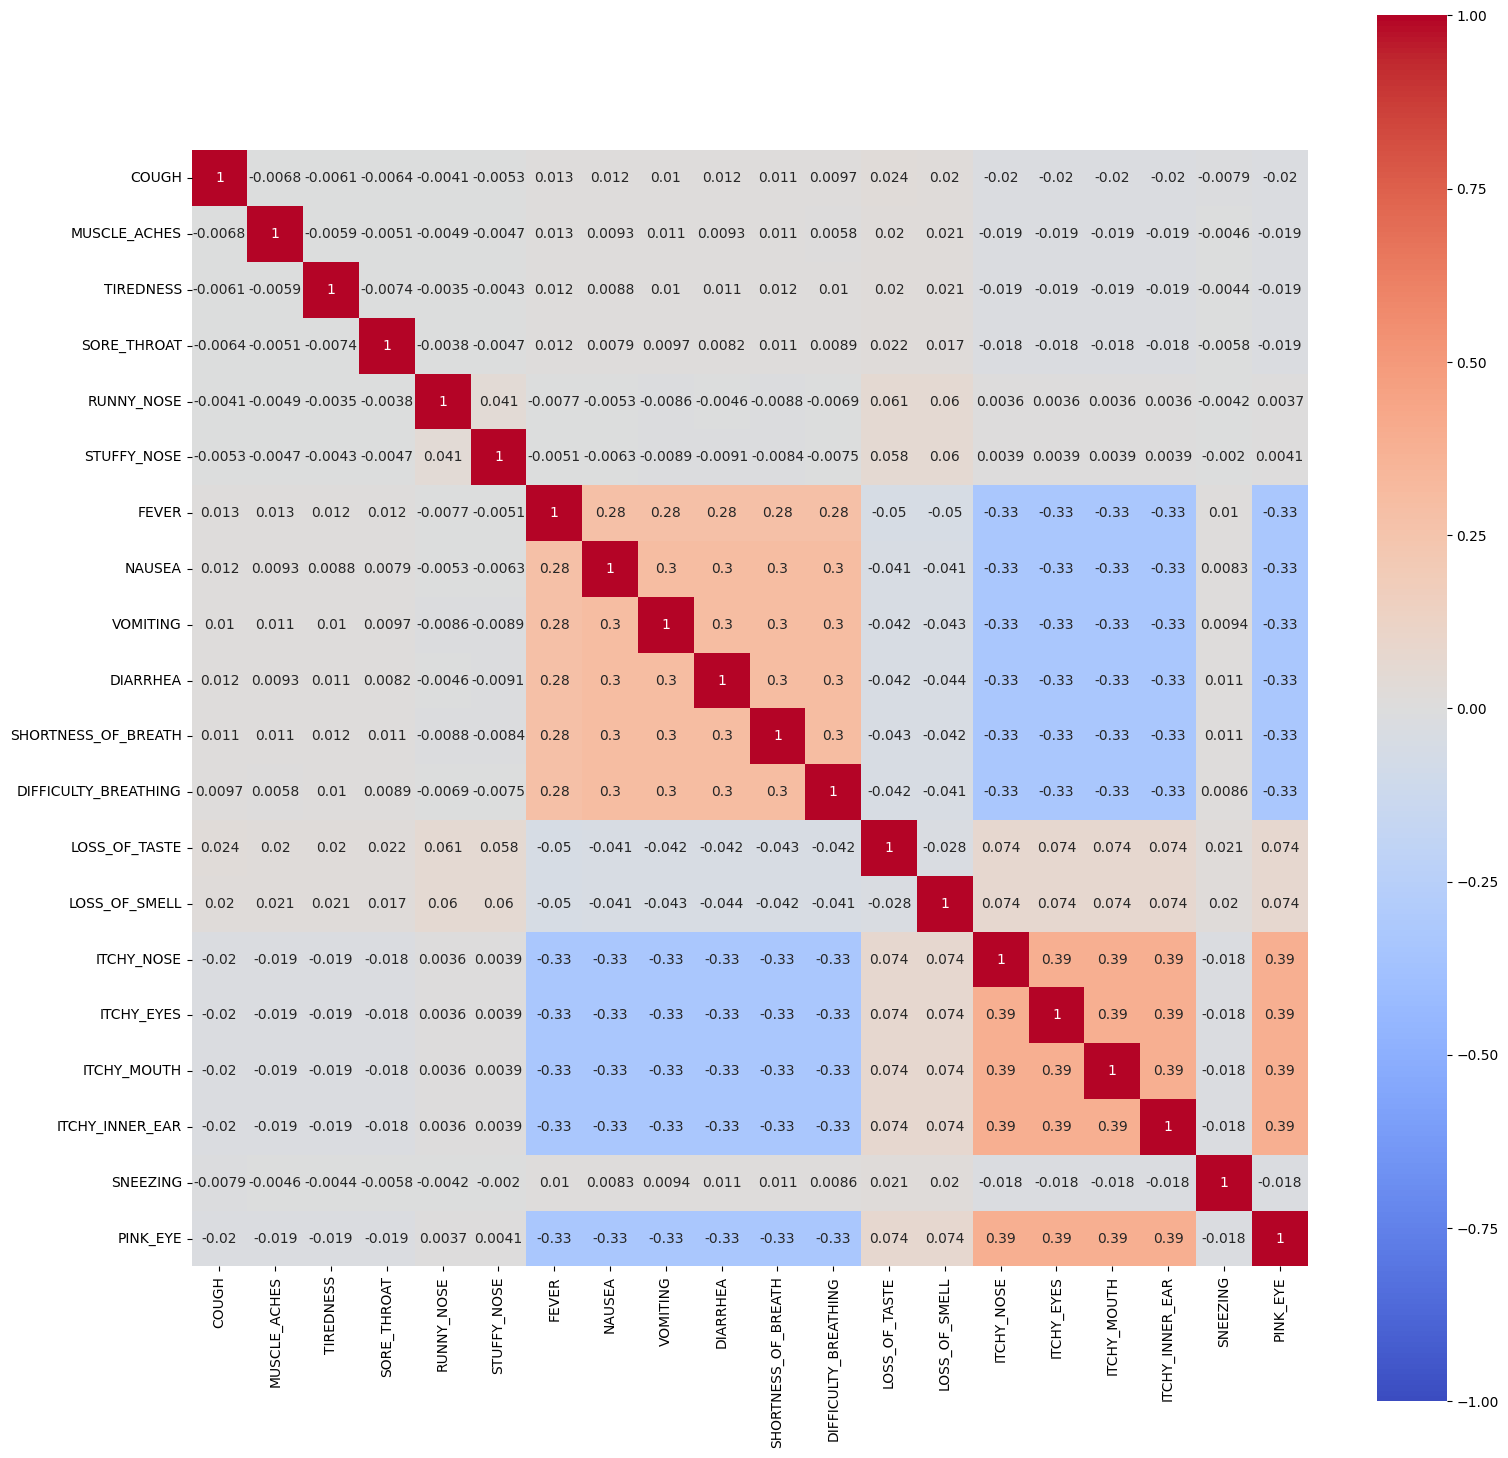

In [46]:
plt.figure(figsize=(18,18))
sns.heatmap(train.corr('pearson'),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

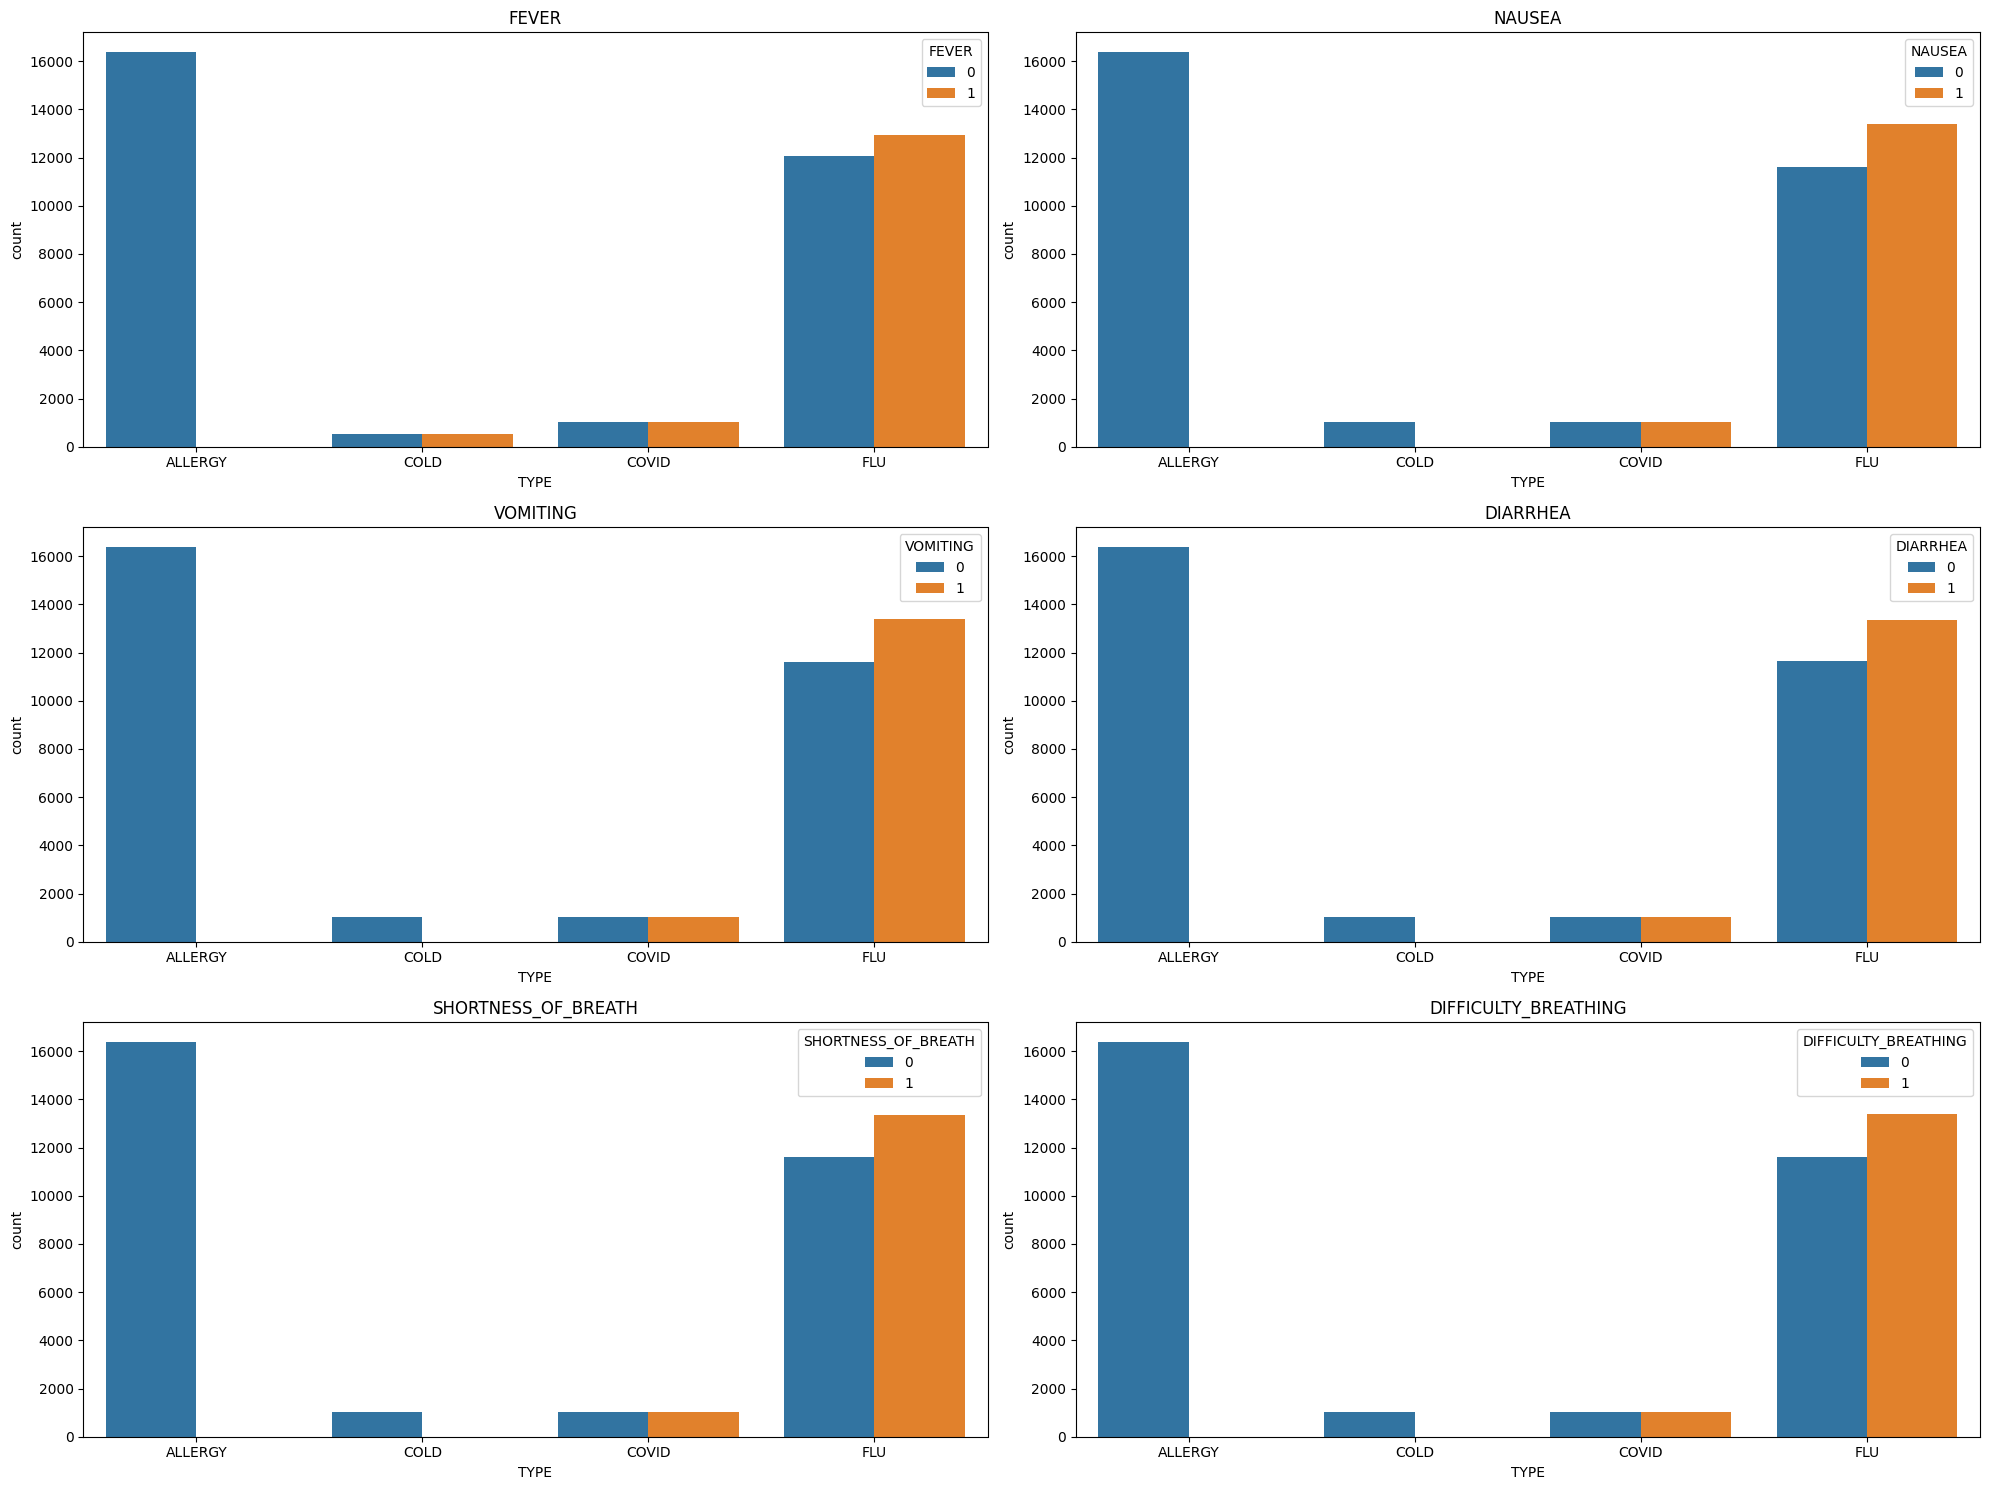

In [48]:
#cols = train.columns
cols = ['FEVER', 'NAUSEA', 'VOMITING', 'DIARRHEA',
       'SHORTNESS_OF_BREATH', 'DIFFICULTY_BREATHING']
num_cols = len(cols)
nrows = np.ceil(num_cols/2).astype(int)
fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(20,5*nrows))
axes = axes.flatten()
for i, col in enumerate(cols):
    # sns.countplot(x=col, data=df, ax=axes[i])
    sns.countplot(x='TYPE', data=train, hue=col,ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

<Axes: ylabel='TYPE'>

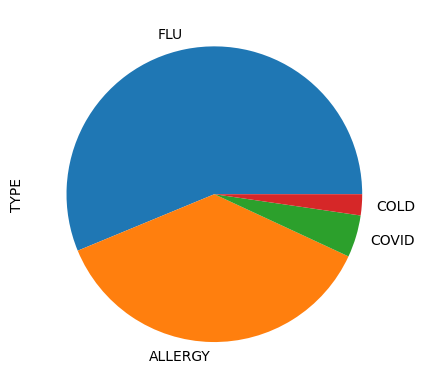

In [51]:
train['TYPE'].value_counts().plot.pie()

In [53]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X = train.iloc[:,20].values
train.iloc[:,20] = labelencoder.fit_transform(X)
X = X.reshape(-1,1)

<ipython-input-53-b9de37bad22e>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train.iloc[:,20] = labelencoder.fit_transform(X)


In [133]:
train.describe()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
count,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,...,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000
mean,0.520662,0.519762,0.519897,0.519358,0.496232,0.495850,0.325400,0.324253,0.324523,0.323465,...,0.324455,0.422986,0.423234,0.184285,0.184285,0.184285,0.184285,0.519313,0.184240,1.802353
std,0.499579,0.499615,0.499610,0.499631,0.499991,0.499988,0.468529,0.468100,0.468201,0.467804,...,0.468176,0.494039,0.494077,0.387720,0.387720,0.387720,0.387720,0.499633,0.387684,1.421413
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [87]:
#Making the input data
x=train.iloc[:,0:20]

In [88]:
y=train.iloc[:,20]

In [170]:
#MAKING Train and Test variables
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2) #random_state = 0 is to avoid duplicates

#By default Training variables get 75% of data and Testing variables get the remaining 25% of the data.

In [171]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x_train_min= mms.fit_transform(x_train)
x_test_min = mms.transform(x_test)
from sklearn.preprocessing import StandardScaler
independent_scaler = StandardScaler()
x_train_norm = independent_scaler.fit_transform(x_train)
x_test_norm = independent_scaler.transform(x_test)

In [172]:
print(x.shape) #100%
print(x_train.shape) #75%
print(x_test.shape) #25%
print(y.shape) #100%
print(y_train.shape) #75%
print(y_test.shape) #25%

(44453, 20)
(35562, 20)
(8891, 20)
(44453,)
(35562,)
(8891,)


In [173]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [174]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [175]:
# Predicting the output
y_pred = model.predict(x_test) #using the input testing values , we predict the output

In [176]:
y_test #Actual output values

39086    3
40469    3
43921    3
11899    0
861      0
        ..
33417    3
37169    3
25476    3
3134     0
16913    1
Name: TYPE, Length: 8891, dtype: int64

In [177]:
#Finding the accuracy of our model

from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 94.0%


In [178]:
model.predict([[1,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

LR Accuracy: 93.42031267573951
              precision    recall  f1-score   support

     ALLERGY       0.97      0.99      0.98      3341
        COLD       0.61      0.46      0.53       198
       COVID       0.49      0.65      0.56       380
         FLU       0.97      0.94      0.95      4972

    accuracy                           0.93      8891
   macro avg       0.76      0.76      0.75      8891
weighted avg       0.94      0.93      0.94      8891



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


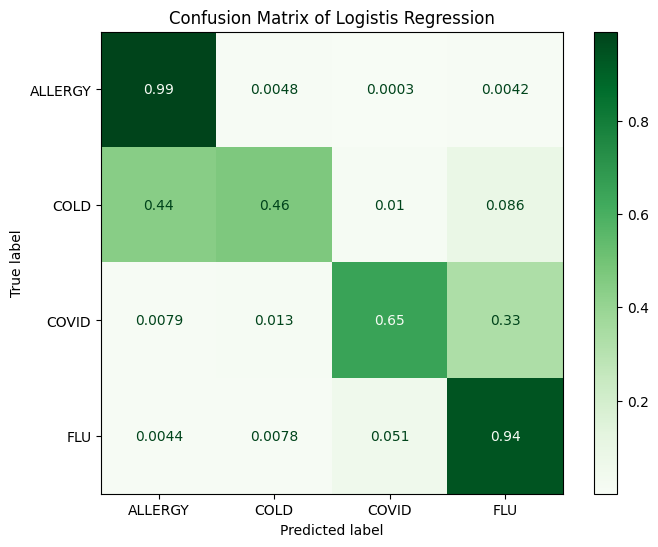

In [179]:
#Logistic Regression MinMax
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report ,confusion_matrix ,ConfusionMatrixDisplay
lgr = LogisticRegression()
lgr.fit(x_train_min , y_train)

prediction = lgr.predict(x_test_min)
from sklearn import metrics
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,prediction)
print('LR Accuracy:',accuracy*100)

target_names = ['ALLERGY','COLD','COVID','FLU']
print(classification_report(y_test, prediction.reshape(-1,1), target_names=target_names))


cm = confusion_matrix(y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
plt.title('Confusion Matrix of Logistis Regression')
disp.plot(ax=ax,cmap='Greens')

KNN Accuracy 91.54200877291643
              precision    recall  f1-score   support

     ALLERGY       0.96      0.99      0.98      3341
        COLD       0.46      0.33      0.39       198
       COVID       0.36      0.43      0.39       380
         FLU       0.95      0.93      0.94      4972

    accuracy                           0.92      8891
   macro avg       0.68      0.67      0.67      8891
weighted avg       0.92      0.92      0.92      8891



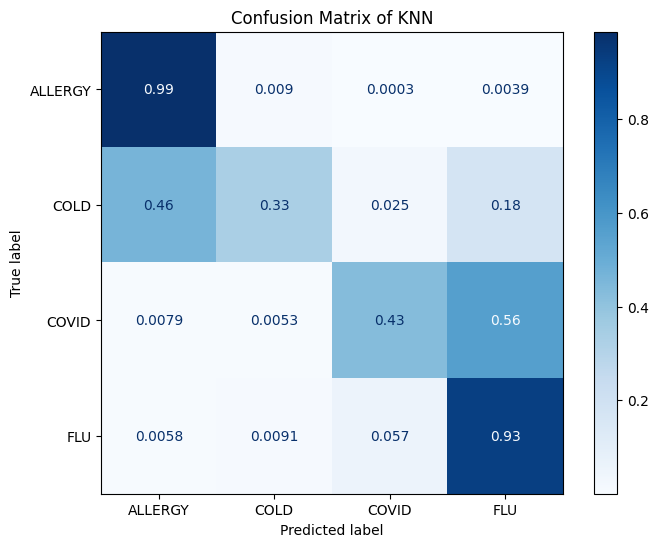

In [180]:
#KNN Algorithm MINMAX
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(x_train_min , y_train)

prediction =knn.predict(x_test_min)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, prediction)
print('KNN Accuracy', accuracy*100)

target_names = ['ALLERGY','COLD','COVID','FLU']
print(classification_report(y_test, prediction.reshape(-1,1), target_names=target_names))   # Reshaping is done to convert the data alignment from horizontal to vertical as excel representation

cm = confusion_matrix(y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
plt.title('Confusion Matrix of KNN')
disp.plot(ax=ax,cmap='Blues')

SVM Accuracy: 92.39680575863233
              precision    recall  f1-score   support

     ALLERGY       0.95      1.00      0.98      3341
        COLD       0.65      0.40      0.49       198
       COVID       0.42      0.68      0.52       380
         FLU       0.97      0.91      0.94      4972

    accuracy                           0.92      8891
   macro avg       0.75      0.75      0.73      8891
weighted avg       0.94      0.92      0.93      8891



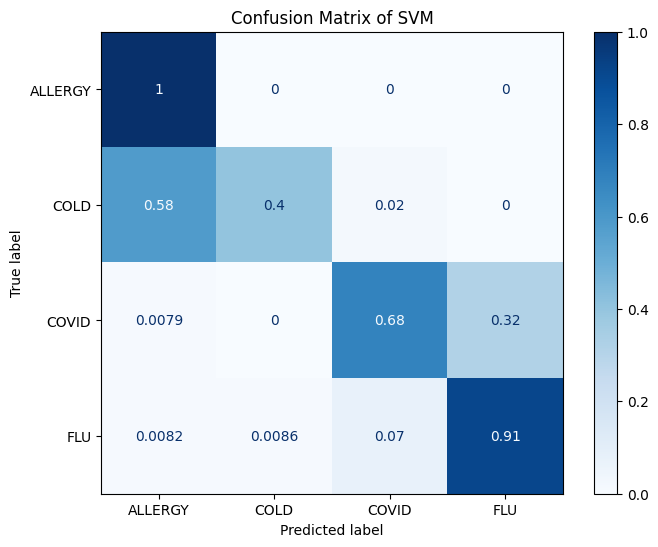

In [181]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train_min, y_train)

prediction = svc.predict(x_test_min)
prediction

accuracy = metrics.accuracy_score(y_test , prediction)
print('SVM Accuracy:', accuracy*100)

target_names = ['ALLERGY','COLD','COVID','FLU']
print(classification_report(y_test, prediction.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
plt.title('Confusion Matrix of SVM')
disp.plot(ax=ax,cmap='Blues')

RF Accuracy: 93.44280733325834
              precision    recall  f1-score   support

     ALLERGY       0.96      0.99      0.98      3341
        COLD       0.84      0.25      0.38       198
       COVID       0.00      0.00      0.00       380
         FLU       0.92      0.99      0.95      4972

    accuracy                           0.93      8891
   macro avg       0.68      0.56      0.58      8891
weighted avg       0.89      0.93      0.91      8891



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


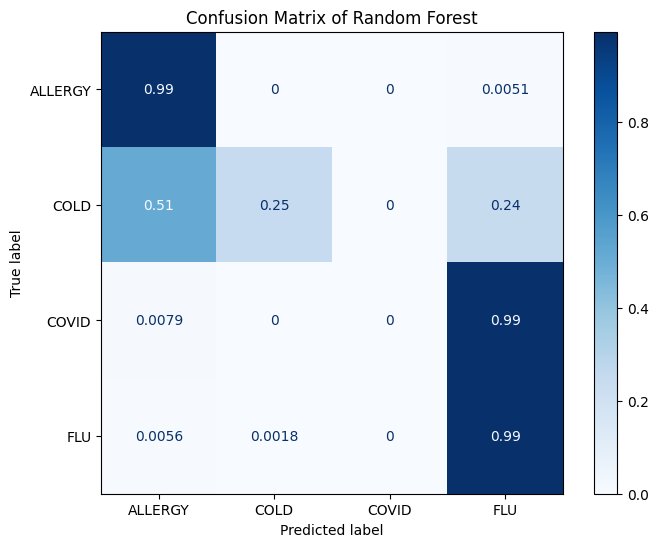

In [183]:
#Random Forest MINMAX
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=12)
rfc.fit(x_train_min , y_train)

prediction = rfc.predict(x_test_min)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test , prediction)
print('RF Accuracy:',accuracy*100)

target_names = ['ALLERGY','COLD','COVID','FLU']
print(classification_report(y_test, prediction.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
plt.title('Confusion Matrix of Random Forest')
disp.plot(ax=ax,cmap='Blues')

DT accuracy:  74.72725227758407
              precision    recall  f1-score   support

     ALLERGY       1.00      0.50      0.67      3341
        COLD       0.00      0.00      0.00       198
       COVID       0.00      0.00      0.00       380
         FLU       0.69      1.00      0.82      4972

    accuracy                           0.75      8891
   macro avg       0.42      0.38      0.37      8891
weighted avg       0.76      0.75      0.71      8891



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


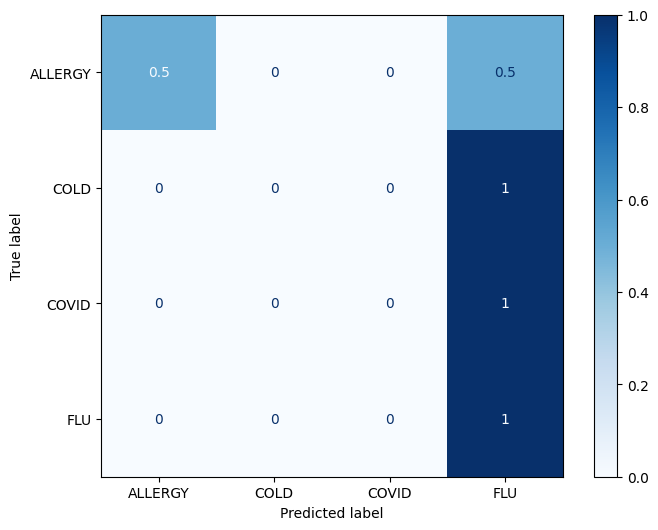

In [188]:
#Decision Tree MIN
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 1, random_state = 0)
dt.fit(x_train_min , y_train)

prediction = dt.predict(x_test_min)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,prediction)
print("DT accuracy: ",accuracy*100)

target_names = ['ALLERGY','COLD','COVID','FLU']
print(classification_report(y_test, prediction.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')

NB Accuracy 93.51029130581487
              precision    recall  f1-score   support

     ALLERGY       1.00      0.97      0.99      3341
        COLD       0.52      1.00      0.68       198
       COVID       0.49      0.98      0.65       380
         FLU       1.00      0.90      0.95      4972

    accuracy                           0.94      8891
   macro avg       0.75      0.96      0.82      8891
weighted avg       0.97      0.94      0.94      8891



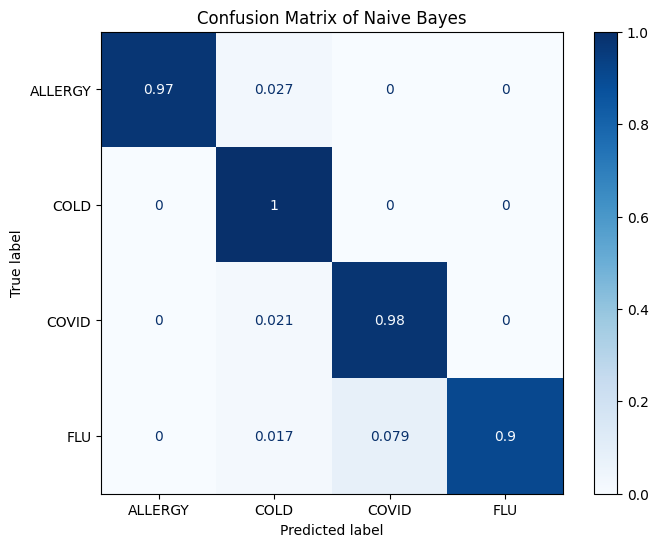

In [190]:
#navbayes gaussian minmax
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train_min, y_train)

prediction = model.predict(x_test_min)
prediction

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, prediction)
print('NB Accuracy',accuracy*100)

target_names = ['ALLERGY','COLD','COVID','FLU']
print(classification_report(y_test, prediction.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
plt.title('Confusion Matrix of Naive Bayes')
disp.plot(ax=ax,cmap='Blues')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ensemble: 93.51029130581487
              precision    recall  f1-score   support

     ALLERGY       1.00      0.97      0.99      3341
        COLD       0.52      1.00      0.68       198
       COVID       0.49      0.98      0.65       380
         FLU       1.00      0.90      0.95      4972

    accuracy                           0.94      8891
   macro avg       0.75      0.96      0.82      8891
weighted avg       0.97      0.94      0.94      8891



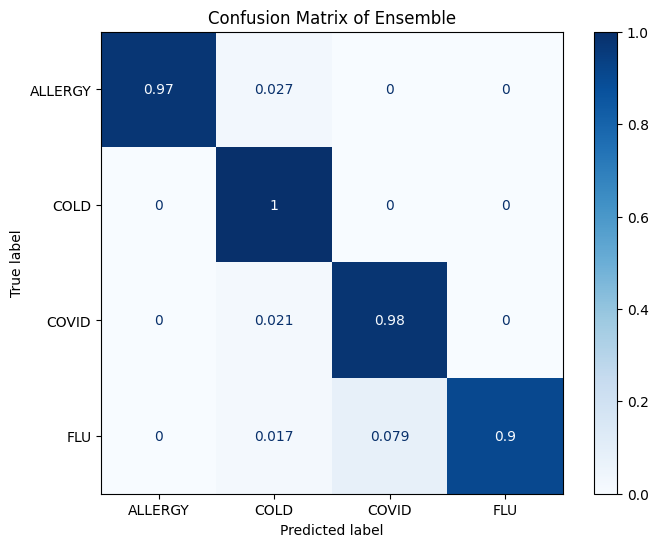

In [201]:
from sklearn.ensemble import VotingClassifier
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
nvby_clf = GaussianNB()
svc_clf = SVC()
knn_clf = KNeighborsClassifier(n_neighbors = 6)
#Cat_clf=CatBoostClassifier()
#AB_clf=AdaBoostClassifier()
voting_clf = VotingClassifier(
estimators=[('RF', rnd_clf), ('NB', nvby_clf), ('LR', log_clf), ('SVC', svc_clf), ('KNN', knn_clf)],
voting='hard')
voting_clf.fit(x_train_min, y_train)
accuracy = metrics.accuracy_score(y_test , prediction)
print('Ensemble:',accuracy*100)

target_names = ['ALLERGY','COLD','COVID','FLU']
print(classification_report(y_test, prediction.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
plt.title('Confusion Matrix of Ensemble')
disp.plot(ax=ax,cmap='Blues')